In [2]:
## Load package dependicies
import numpy as np
import os
import cv2
import pandas as pd

In [3]:
## Load in image folder.
data_directory = 'C:\\Users\\User\\Desktop\\leukemia capstone'
categories = ['BAS','EBO','EOS','KSC','LYA','LYT','MMZ','MOB','MON',
              'MYB','NGS','MYO','NGB','PMB','PMO']

In [4]:
img_folder = []
class_folder = []
def create_dataset(dataset):
    for label in dataset:
        path = os.path.join(data_directory,label)
        ##classification = categories.index(label)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,image))
                img_folder.append(image_array)
                class_folder.append(label)
            except Exception as e:
                print("Image was a problem {}".format(image))

In [5]:
create_dataset(categories)

In [6]:
red_channel = []
green_channel = []
blue_channel = []
for x in img_folder:
    red_channel.append(x[:,:,0])
    green_channel.append(x[:,:,1])
    blue_channel.append(x[:,:,2])  

In [7]:
from scipy import stats

def bin_pixels(image, centers):
    bins = [stats.norm.pdf(image, loc=c, scale=std) for c in centers]
    bins = np.stack(bins,axis=-1)
    bins /= bins.sum(axis=1)[:,np.newaxis]
    bins = bins.sum(axis=0)
    return bins

def make_bins(image_folder, df=None):
    """ Bin images according to gaussian distribution, one row per image 
        Append these to the dataframe or create one if none is passed
    """
    images = map(np.ravel,image_folder)
    images = np.vstack(images)
    if df is None:
        centers = np.array([35, 85, 125, 165, 205, 245])
    else:
        centers = df.columns.to_numpy()
    binned_images = np.apply_along_axis(bin_pixels, 1, images, centers)
    binned_images_df = pd.DataFrame(binned_images, columns=centers)
    df = binned_images_df if df is None else df.append(binned_images_df, ignore_index=True)
    return df


In [10]:
std = 25
df_1= pd.DataFrame(columns=[35, 85, 125, 165, 205, 245])
df_1 = make_bins(red_channel, df_1)

<ipython-input-7-607557c42e15>:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  images = np.vstack(images)


In [11]:
df_2 = pd.DataFrame(columns=[35, 85, 125, 165, 205, 245])
df_2 = make_bins(green_channel, df_2)

<ipython-input-7-607557c42e15>:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  images = np.vstack(images)


In [12]:
df_3 = pd.DataFrame(columns=[35, 85, 125, 165, 205, 245])
df_3 = make_bins(blue_channel, df_3)

<ipython-input-7-607557c42e15>:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  images = np.vstack(images)


In [13]:
df_1.rename(columns={35:'Red-35', 85:'Red-85', 125:'Red-125', 165:'Red-165', 205:'Red-205', 245:'Red-245'}, inplace=True)
df_2.rename(columns={35:'Green-35', 85:'Green-85', 125:'Green-125', 165:'Green-165', 205:'Green-205', 245:'Green-245'}, inplace=True)
df_3.rename(columns={35:'Blue-35', 85:'Blue-85', 125:'Blue-125', 165:'Blue-165', 205:'Blue-205', 245:'Blue-245'}, inplace=True)

In [14]:
result = pd.concat([df_1, df_2, df_3], axis=1)

In [20]:
result.shape

(18365, 19)

In [19]:
result['label'] = class_folder

In [21]:
result.head()

,Red-35,Red-85,Red-125,Red-165,Red-205,Red-245,Green-35,Green-85,Green-125,Green-165,Green-205,Green-245,Blue-35,Blue-85,Blue-125,Blue-165,Blue-205,Blue-245,label
0,92.611153,1433.132949,8642.254729,69937.486747,79410.465794,484.048628,2713.056426,5919.764392,32256.450380,56249.634931,51731.521276,11129.572595,4134.540524,5069.536631,6820.126530,69862.663933,68661.263646,5451.868736,BAS
1,0.026626,96.150181,5916.660234,55150.081644,76105.243294,22731.838021,3574.548826,5838.355745,22027.161157,37948.928414,57935.989097,32675.016761,6597.507421,5174.168351,5082.820648,36157.533460,74912.314395,32075.655724,BAS
2,0.005343,25.456627,3194.151093,49148.566720,105694.555823,1937.264394,7409.730967,5570.202107,20226.279384,24806.441590,92763.658883,9223.687069,65.303118,1411.120999,9843.964978,41783.129168,91421.601597,15474.880139,BAS
3,0.097392,207.429434,10008.834105,64114.026410,84956.580879,713.031780,3985.963097,7844.538222,40157.894662,21615.743912,73150.862824,13244.997283,4903.184007,7720.045992,6191.810000,50107.457688,77659.533858,13417.968455,BAS
4,1.380553,811.379342,17572.875896,64450.234946,75945.779362,1218.349900,5335.839182,7006.210689,39660.902422,27791.620071,66318.271986,13887.155650,7282.299456,4303.969397,13185.066353,57846.295545,73429.124937,3953.244312,BAS


In [22]:
result.to_csv('image_bins_2.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
image_labels = gle.fit_transform(result['label'])
result['label'] = image_labels
result.head()

,Red-35,Red-85,Red-125,Red-165,Red-205,Red-245,Green-35,Green-85,Green-125,Green-165,Green-205,Green-245,Blue-35,Blue-85,Blue-125,Blue-165,Blue-205,Blue-245,label
0,92.611153,1433.132949,8642.254729,69937.486747,79410.465794,484.048628,2713.056426,5919.764392,32256.450380,56249.634931,51731.521276,11129.572595,4134.540524,5069.536631,6820.126530,69862.663933,68661.263646,5451.868736,0
1,0.026626,96.150181,5916.660234,55150.081644,76105.243294,22731.838021,3574.548826,5838.355745,22027.161157,37948.928414,57935.989097,32675.016761,6597.507421,5174.168351,5082.820648,36157.533460,74912.314395,32075.655724,0
2,0.005343,25.456627,3194.151093,49148.566720,105694.555823,1937.264394,7409.730967,5570.202107,20226.279384,24806.441590,92763.658883,9223.687069,65.303118,1411.120999,9843.964978,41783.129168,91421.601597,15474.880139,0
3,0.097392,207.429434,10008.834105,64114.026410,84956.580879,713.031780,3985.963097,7844.538222,40157.894662,21615.743912,73150.862824,13244.997283,4903.184007,7720.045992,6191.810000,50107.457688,77659.533858,13417.968455,0
4,1.380553,811.379342,17572.875896,64450.234946,75945.779362,1218.349900,5335.839182,7006.210689,39660.902422,27791.620071,66318.271986,13887.155650,7282.299456,4303.969397,13185.066353,57846.295545,73429.124937,3953.244312,0


In [25]:
from sklearn.preprocessing import StandardScaler
subset_1 = result[result['label'].isin([12,5,10])]
scaler = StandardScaler()
subset_1 = scaler.fit_transform(subset_1)

In [26]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 3, random_state=42)
pca_file = pca.fit_transform(subset_1)

In [27]:
pca_df = pd.DataFrame(pca_file, columns = ['PC1', 'PC2', 'PC3'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [31]:
labels = result[result['label'].isin([12,5,10])]['label']

In [32]:
pca_df['class'] = labels
pca_df['class'] = pd.Categorical(pca_df['class'])
my_color = pca_df['class'].cat.codes

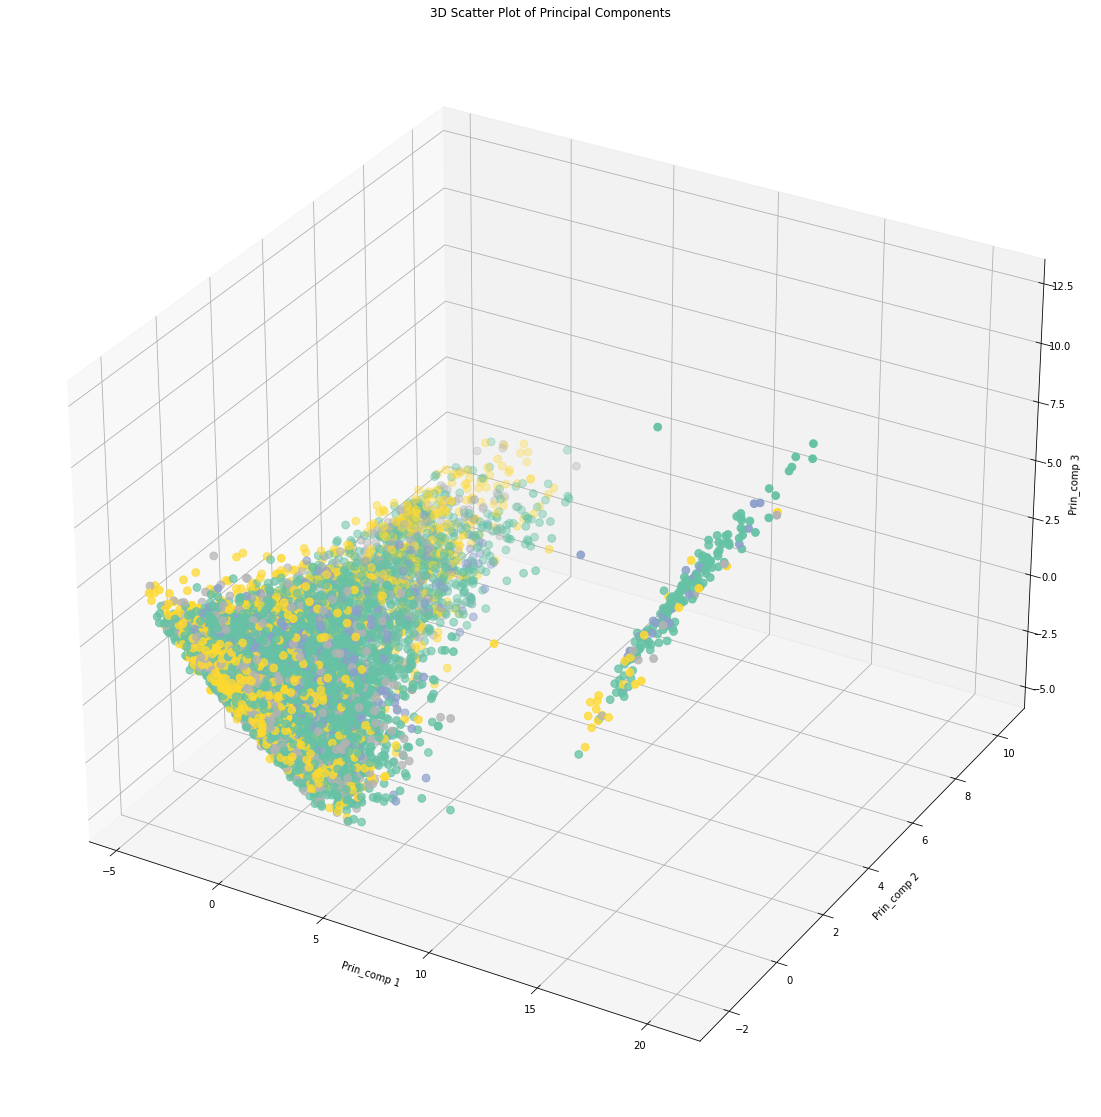

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pca_df['PC1'],pca_df['PC2'],pca_df['PC3'],c=my_color,cmap='Set2_r',s=60)
ax.set_xlabel('Prin_comp 1')
ax.set_ylabel('Prin_comp 2')
ax.set_zlabel('Prin_comp 3')
ax.set_title('3D Scatter Plot of Principal Components')
plt.show()